In [ ]:
!pip install antigranular

In [2]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, dataset = "Iris Dataset")

Connected to Antigranular server session id: d7257a84-bfef-4d77-a91a-1b8165fc56be
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server


In [3]:
%%ag
from op_pandas import PrivateDataFrame , PrivateSeries
from ag_utils import load_dataset, export

response = load_dataset("Iris Dataset")

train_x = response["train_x"]
train_y = response["train_y"]
test_x = response["test_x"]

### How the columns look like

In [4]:
%%ag
export(train_x.columns, "columns")

Setting up exported variable in local environment: columns


In [5]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [6]:
%%ag
hist2d = train_x.hist2d(1, 'sepal_length', 'sepal_width')
export(hist2d, 'hist2d')

Setting up exported variable in local environment: hist2d


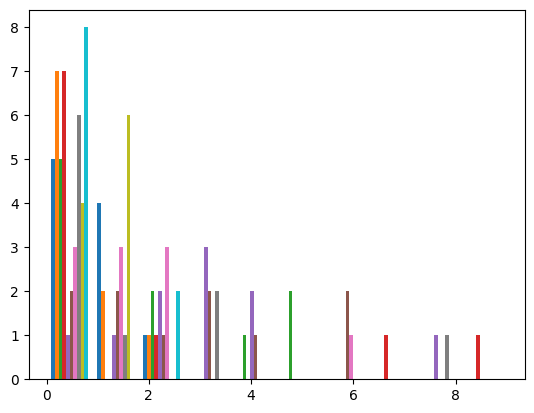

In [7]:
import matplotlib.pyplot as plt
plt.hist(hist2d[0], bins = 10)
plt.show()

In [8]:
%%ag
hist2d = train_x.hist2d(1, 'petal_length', 'petal_width')
export(hist2d, 'hist2d_petal')

Setting up exported variable in local environment: hist2d_petal


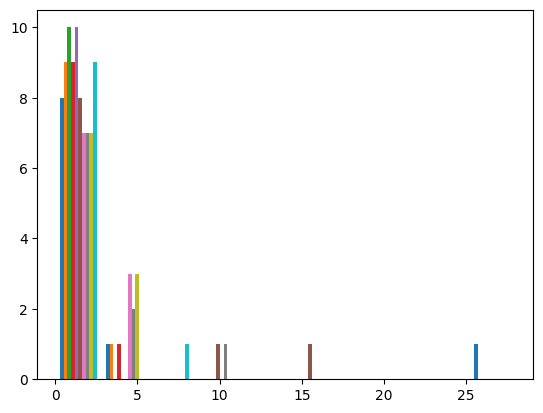

In [9]:
plt.hist(hist2d_petal[0], bins = 10)
plt.show()

In [10]:
%%ag
export(train_x.describe(eps = 1), "describe")

Total epsilon spent = 1.0000

Setting up exported variable in local environment: describe


In [11]:
describe

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,6.350264,3.347633,3.896522,0.100000
std,0.781523,0.660261,2.353805,1.151976
min,7.737002,2.001993,2.104866,0.814664
25%,6.158785,3.327927,1.023538,0.183878
50%,6.068576,2.984107,5.027048,0.884369
75%,5.246356,3.182141,6.186321,0.711309
max,7.648789,3.478554,6.590820,0.481685


### Encoding train_y

In [12]:
%%ag
from typing import Any
# encoding categoricals
def func_(x:str)-> int:
  if x == 'Iris-setosa':
    return 0
  elif x == 'Iris-versicolor':
    return 1
  else: # Iris-virginica
    return 2

train_y_encoded = train_y.applymap(func_ , output_bounds={'species':(0,2)})

## Logistic Regression




In [13]:
%%ag
from op_diffprivlib.models import LogisticRegression

In [14]:
%%ag
train_x_2 = train_x ** 2
l_2_norm = train_x_2.sum(axis = 1) ** 0.5
l_2_norm = l_2_norm.quantile(1, eps=1)    # dp_max(sum(x**2, 1)**0.5)

In [15]:
%%ag
logr = LogisticRegression(epsilon = 3, data_norm = l_2_norm)
logr.fit(train_x, train_y_encoded)
test_y = logr.predict(test_x)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [16]:
%%ag
export(test_y, "test_y")

Setting up exported variable in local environment: test_y


In [17]:
test_y

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2])

In [18]:
def func_(x: int)-> str:
  if x == 0:
    return 'Iris-setosa'
  elif x == 1:
    return 'Iris-versicolor'
  else:
    return 'Iris-virginica'

test_y = [func_(x) for x in test_y]

In [19]:
test_y

['Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica']

In [20]:
import pandas as pd
y_df = pd.DataFrame(test_y)
result = session.submit_predictions(y_df)
print(result) ## output will be different during a competition

{'score': {}}
